<a href="https://www.kaggle.com/code/siddharth164/netflix-data-analysis?scriptVersionId=235313141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 

#For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 


import warnings
warnings.filterwarnings("ignore")

/kaggle/input/netflix-data-analysis/netflix_movies (1).csv


# Introduction 

In this project, I will explore and visualize a Netflix dataset containing information about various shows and movies available on the platform. The dataset includes key attributes such as title, director, cast, country of origin, release year, rating, duration, and genres. Using Seaborn, I will create insightful visualizations to uncover trends and patterns in Netflix's content library.

This project aims to analyze Netflix’s content library to uncover trends, patterns, and key insights. By visualizing data, we seek to understand Netflix’s content strategy, audience preferences, and market trends.

In [2]:
#Loading the dataset
file = '/kaggle/input/netflix-data-analysis/netflix_movies (1).csv'
df = pd.read_csv(file)


# Understanding the dataset

In [3]:
df.head() #Preview the datset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info() # Check column data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.nunique() # Statistics for unique values

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df.shape #Finding the rows and columns 

(8807, 12)

In [7]:
# Finding range of the dataset

starting_range = df['release_year'].min()
ending_range = df['release_year'].max()
print(f"The dataset ranges from",starting_range, f"to", ending_range)

The dataset ranges from 1925 to 2021


#  Data Analysis and Visualizations

The below section will have the following graphs developed by *seaborn*.
* Content Distribution
* Content per year
* Duration range of Movies
* Duration range of TV shows
* Contributions per country
* Movies by directior
* Top 20 longest movies
* Top 20 shortest movies
* Top 20 longest running TV shows
* Content per rating 

## Content Distribution 

In [8]:
# Group by count of type
numtype = df.groupby(['type']).size().to_frame(name='count').reset_index()

#Calculate percentage
numtype['percentage'] = (numtype['count'] / numtype['count'].sum()) * 100
numtype


,type,count,percentage
0,Movie,6131,69.615079
1,TV Show,2676,30.384921


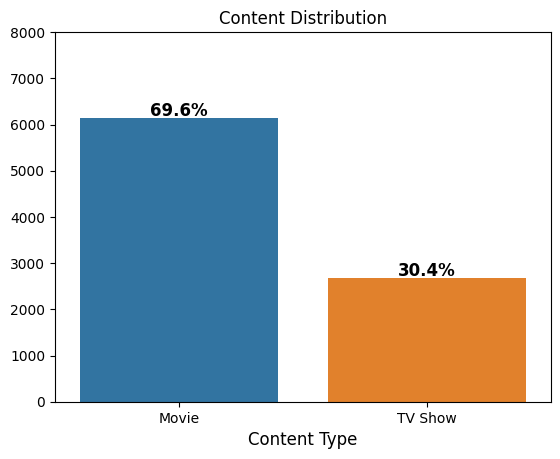

In [9]:
plt.title("Content Distribution")
sns.barplot(x="type", y="count",data = numtype)
for i, row in numtype.iterrows():
    plt.text(i, row["count"]+60, f"{row['percentage']:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 8000)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("", fontsize=12)
plt.show()

## Content per year 

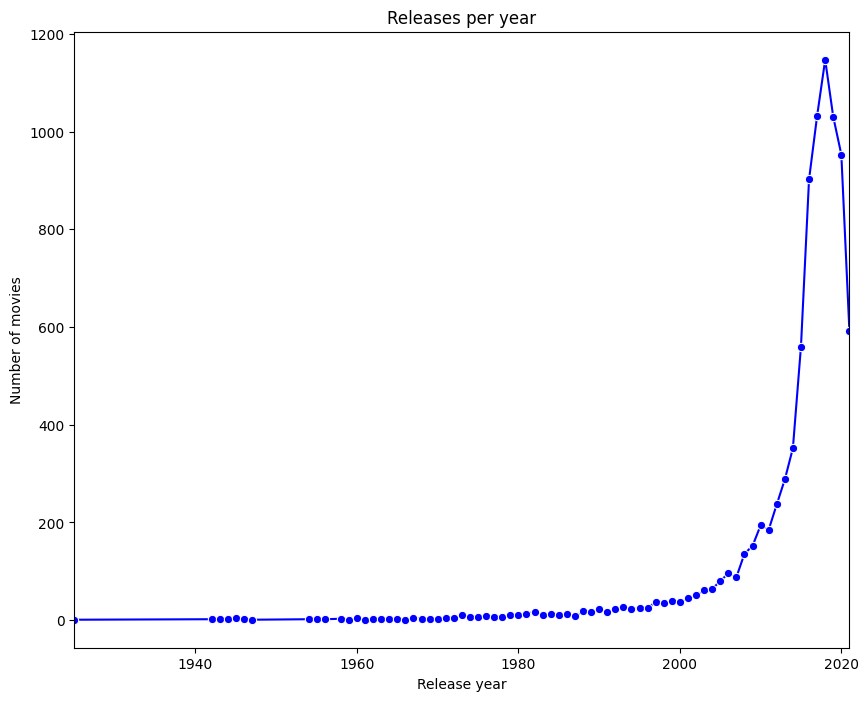

In [10]:
# To find amount of content released per year

content_per_year = df['release_year'].value_counts().reset_index()

plt.figure(figsize=(10,8))
sns.lineplot(data=content_per_year, x='release_year', y='count', marker='o', color='blue')

plt.xlim(content_per_year['release_year'].min(), content_per_year['release_year'].max())  # Set x-axis limits

plt.title("Releases per year")
plt.xlabel("Release year")
plt.ylabel("Number of movies")
plt.show()

In [11]:
#To understand type of content released per year

per_year = df.groupby(['release_year', 'type']).size().to_frame(name='count')

per_year.tail(10).sort_values(by='release_year', ascending=False)

count
release_year type          
2021         Movie      277
             TV Show    315
2020         Movie      517
             TV Show    436
2019         Movie      633
             TV Show    397
2018         Movie      767
             TV Show    380
2017         Movie      767
             TV Show    265

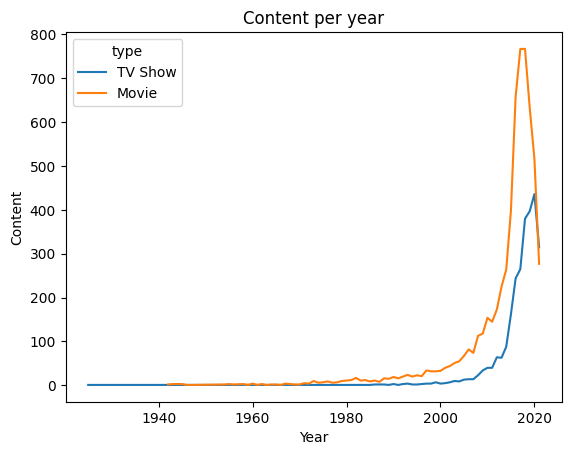

In [12]:
plt.title("Content per year")

sns.lineplot(data=per_year, x="release_year",y="count",hue='type')

plt.ylabel("Content")
plt.xlabel("Year")
plt.show()

## Duration range of movies

In [13]:
#To find duration of movies on Netflix dropping NaN values

movie_durations = df.loc[df['type'] == 'Movie']['duration'].str.replace(' min','').astype(float).reset_index(drop=True)

average_duration = movie_durations.mean()
print(f"Average movie duration: {average_duration:.2f} minutes")
movie_durations

Average movie duration: 99.58 minutes


0        90.0
1        91.0
2       125.0
3       104.0
4       127.0
        ...  
6126     96.0
6127    158.0
6128     88.0
6129     88.0
6130    111.0
Name: duration, Length: 6131, dtype: float64

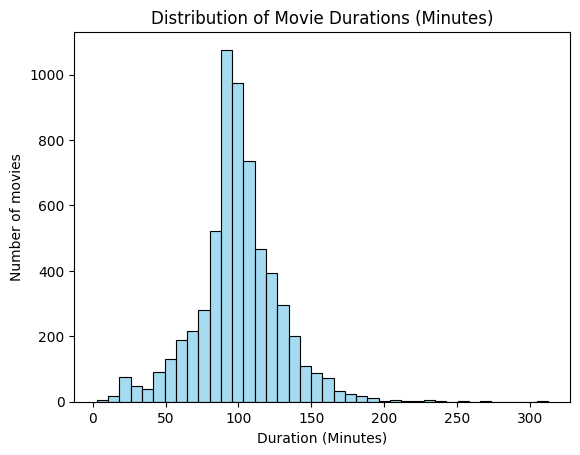

In [14]:
plt.title("Distribution of Movie Durations (Minutes)")

sns.histplot(movie_durations, bins=40, kde=False, color="skyblue")

plt.ylabel("Number of movies")
plt.xlabel("Duration (Minutes)")
plt.show()

## Average duration of TV Shows

In [15]:
TV_dur = df[df["type"] == "TV Show"][["title", "duration"]].assign(duration=lambda x: x["duration"].str.replace(' Seasons| Season','',regex=True).astype(int))
TV_dur = TV_dur.sort_values(by="duration", ascending=False).reset_index(drop=True)
average_tvdur = TV_dur["duration"].mean()
print(f"Average TV Show season spans: {average_tvdur:.2f} seasons")
TV_dur

Average TV Show season spans: 1.76 seasons


,title,duration
0,Grey's Anatomy,17
1,Supernatural,15
2,NCIS,15
3,Heartland,13
4,COMEDIANS of the world,13
...,...,...
2671,I Have a Script,1
2672,Abyss,1
2673,Unchained Fate,1
2674,The Missing Menu,1


In [16]:
season_counts = (
    TV_dur["duration"]
    .value_counts()
    .sort_index()
    .rename_axis("Number of Seasons")
    .reset_index(name="Count of TV Shows")
    .set_index("Number of Seasons")
)

# Add percentage column
season_counts["Percentage"] = (season_counts["Count of TV Shows"] / season_counts["Count of TV Shows"].sum() * 100).round(1)

# Display the table
season_counts

,Count of TV Shows,Percentage
Number of Seasons,,
1,1793,67.0
2,425,15.9
3,199,7.4
4,95,3.6
5,65,2.4
6,33,1.2
7,23,0.9
8,17,0.6
9,9,0.3


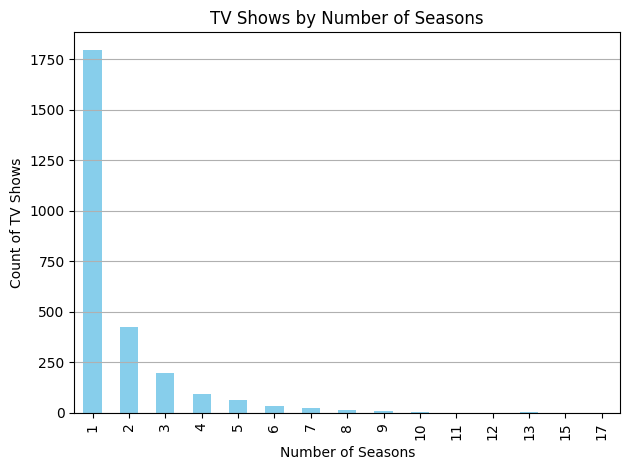

In [17]:
season_counts.plot(kind='bar', y='Count of TV Shows', color="skyblue",legend=False)
plt.title("TV Shows by Number of Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count of TV Shows")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Contributions per country

In [18]:
# To analyse top 10 countries with most contributions

country_contri = df.country.value_counts().to_frame(name='Contributions')
country_contri = country_contri.iloc[:10] 
country_contri

,Contributions
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


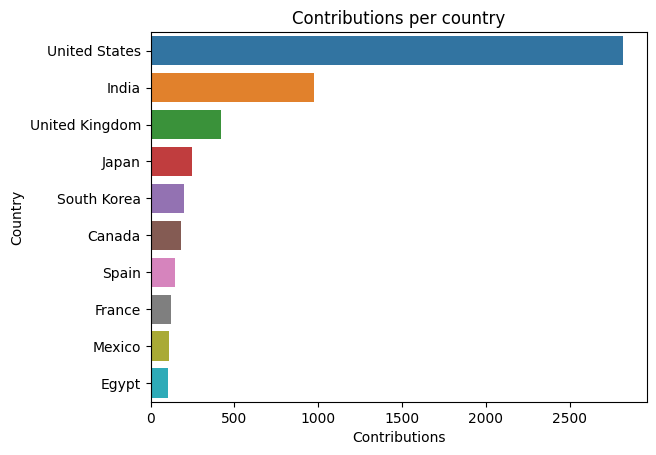

In [19]:
plt.title("Contributions per country")
sns.barplot(x=country_contri["Contributions"],y=country_contri.index)

plt.ylabel("Country")
plt.xlabel("Contributions")
plt.show()

## Movies by directior

In [20]:
# Module for text wrapping and formatting
import textwrap

In [21]:
mov_per_dir = df[df['type'] == 'Movie']['director'].value_counts().reset_index()
mov_per_dir = mov_per_dir.iloc[:10]

mov_per_dir

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,15
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


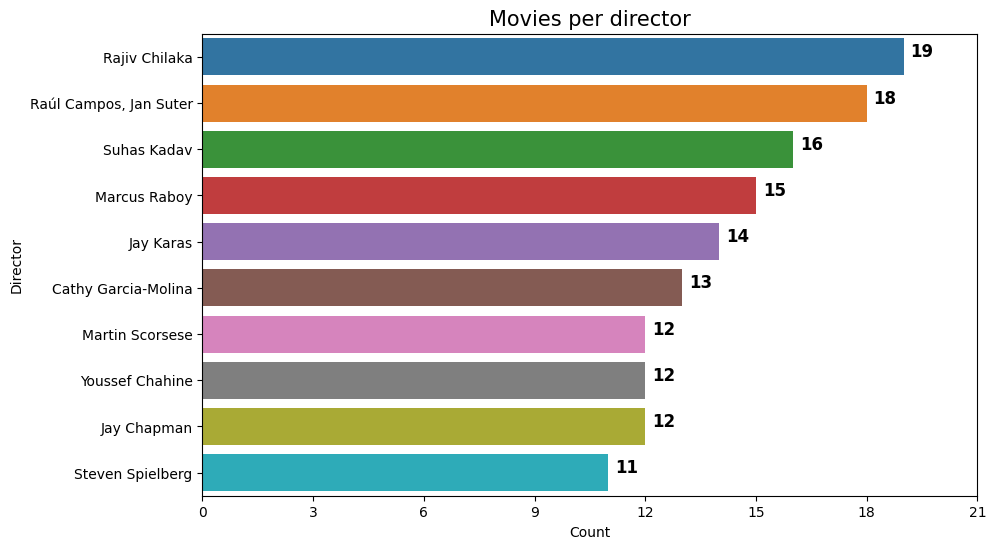

In [22]:
plt.figure(figsize=(10,6))
plt.title("Movies per director", fontsize =15)
sns.barplot (data = mov_per_dir, y = 'director', x ='count')
plt.xticks(ticks=range(0, int(mov_per_dir['count'].max()) + 3, 3))
for i, row in mov_per_dir.iterrows():
    plt.text(row["count"]+0.5,i, f"{row['count']}",ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

## Top 20 longest movies

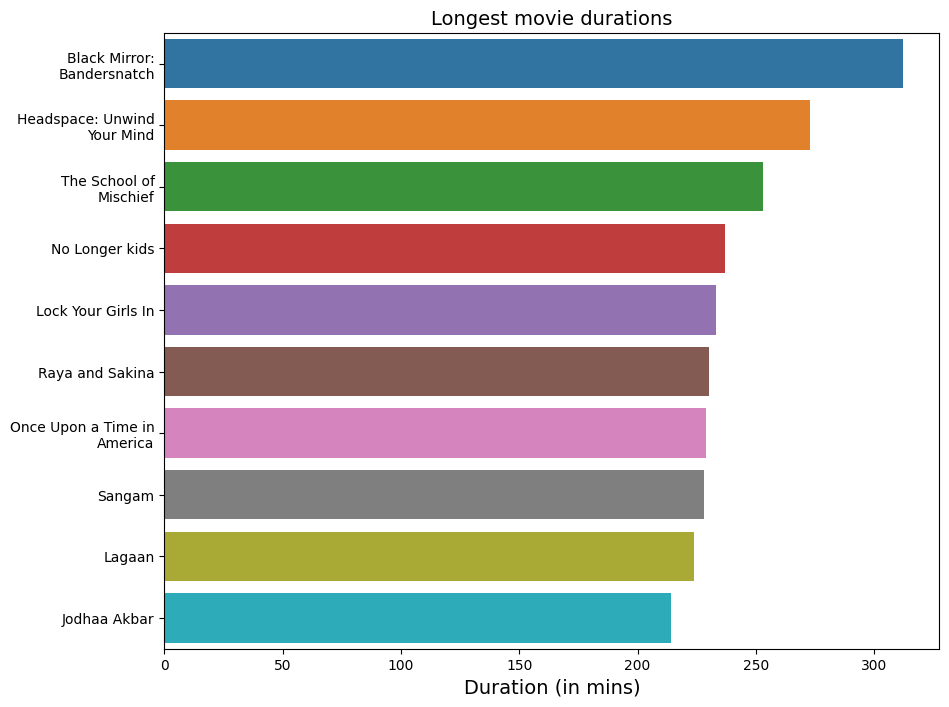

In [23]:
movie_dur = df[df["type"] == "Movie"][["title", "duration"]].assign(duration=lambda x: x["duration"].str.replace(' min','').astype(float))
movie_dur_long = movie_dur.sort_values(by="duration", ascending=False).reset_index(drop=True)
top10_ml = movie_dur_long.head(10)
top10_ml

top10_ml['wrapped_titles'] = top10_ml['title'].apply(lambda x: "\n".join(textwrap.wrap(x, width=20)))  #wrapping text for better visual

plt.figure(figsize=(10, 8))
sns.barplot(y= "wrapped_titles", x= "duration", data = top10_ml)

# Customize the plot
plt.title("Longest movie durations", fontsize=14)
plt.ylabel('')
plt.xlabel("Duration (in mins)",fontsize=14)
plt.show()

## Top 20 shortest movies


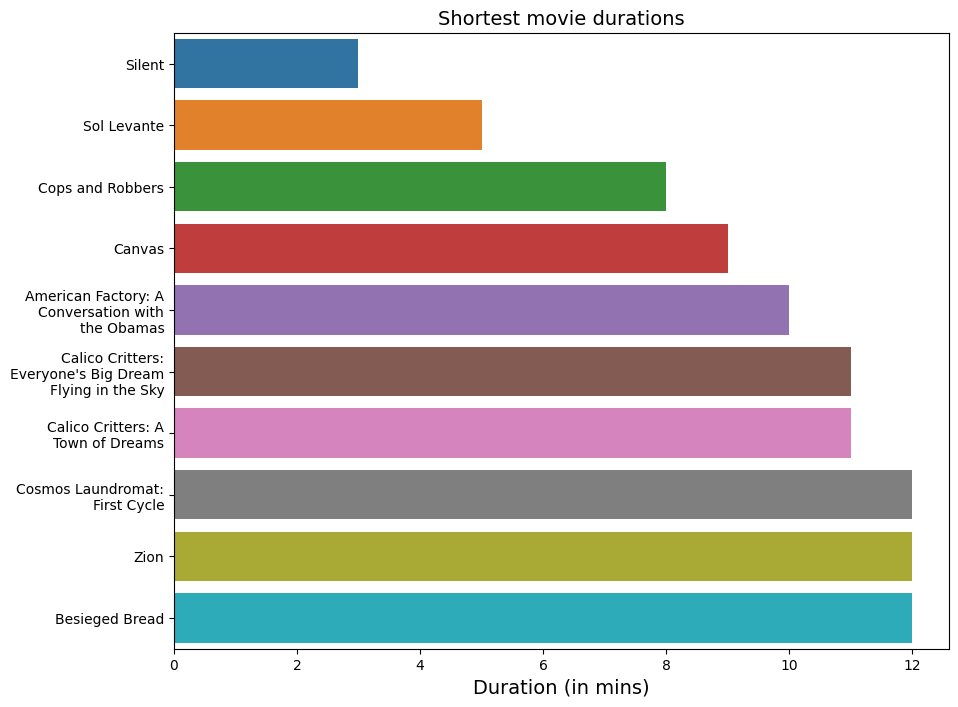

In [24]:
movie_dur_shrt = movie_dur.sort_values(by="duration").reset_index(drop=True)
top10_ms= movie_dur_shrt.head(10)

top10_ms['wrapped_titles'] = top10_ms['title'].apply(lambda x: "\n".join(textwrap.wrap(x, width=20)))  # 20 characters per line

plt.figure(figsize=(10,8))
sns.barplot(y= "wrapped_titles", x= "duration", data = top10_ms)

# Customize the plot
plt.title("Shortest movie durations", fontsize=14)
plt.ylabel('')
plt.xlabel("Duration (in mins)",fontsize=14)
plt.show()

## Top 20 longest running TV shows

In [25]:
top20_dur = TV_dur.head(20)
top20_dur

,title,duration
0,Grey's Anatomy,17
1,Supernatural,15
2,NCIS,15
3,Heartland,13
4,COMEDIANS of the world,13
5,Red vs. Blue,13
6,Trailer Park Boys,12
7,Criminal Minds,12
8,Frasier,11
9,Cheers,11


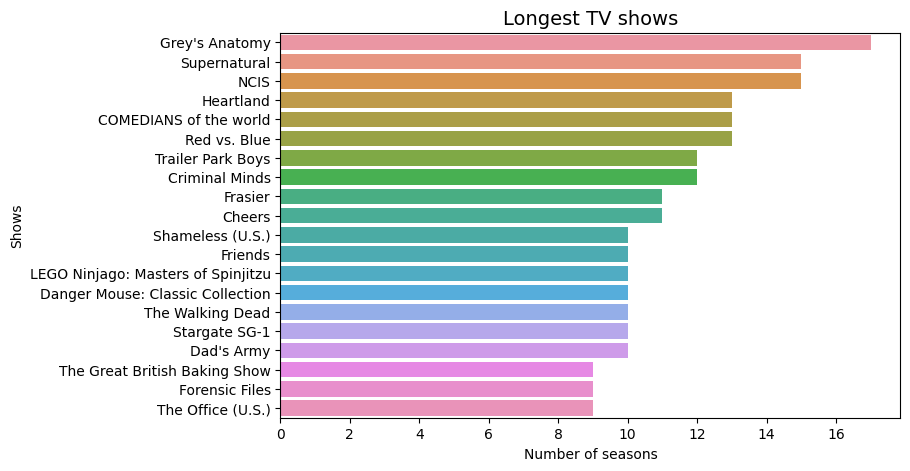

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(y= "title", x= "duration", data = top20_dur)

# Customize the plot
plt.title("Longest TV shows", fontsize=14)
plt.xlabel("Number of seasons")
plt.ylabel("Shows")
plt.show()

## Content per Rating

In [27]:
valid_ratings = [
    "G", "PG", "PG-13", "R", "NC-17", "NR", "UR", 
    "TV-Y", "TV-Y7", "TV-Y7-FV", "TV-G", "TV-PG", "TV-14", "TV-MA"
]

# Filter only rows with valid ratings
rating_df = df[df["rating"].isin(valid_ratings)].copy()

# Merge closely related ratings
rating_df["rating"] = rating_df["rating"].replace({
    "PG": "TV-PG",         # Merge TV-PG and PG
    "TV-Y7-FV": "TV-Y7",   # Merge TV-Y7 and TV-Y7-FV
    "G": "TV-G",           # Merge TV-G and G
    "R": "TV-MA",          # Merge TV-MA and R
    "UR": "NR"             # Merge UR and NR
})

# Create maturity level groups
rating_df["group"] = rating_df["rating"].replace({
    "TV-MA": "Mature",
    "PG-13": "Mature",
    "NC-17": "Mature",
    "TV-14": "Teen",
    "TV-PG": "Teen",
    "TV-Y7": "Kids",
    "TV-Y": "Kids",
    "TV-G": "Kids",
    "NR": "NR"
})

# Count and calculate percentages
rating_counts = rating_df["group"].value_counts().reset_index()
rating_counts.columns = ["group", "count"]
rating_counts["percentages"] = (rating_counts["count"] / rating_counts["count"].sum()) * 100
rating_counts["percentages"] = rating_counts["percentages"].round(2)

rating_counts

,group,count,percentages
0,Mature,4499,51.12
1,Teen,3310,37.61
2,Kids,908,10.32
3,NR,83,0.94


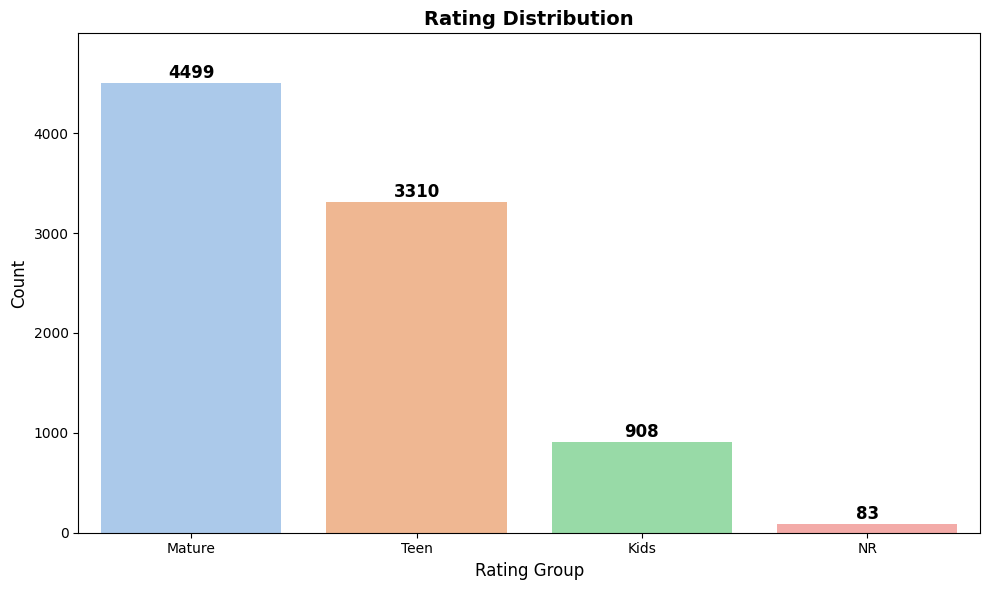

In [28]:
plt.figure(figsize=(10, 6))
plt.title("Rating Distribution", fontsize=14, fontweight='bold')

sns.barplot(x="group", y="count", data=rating_counts, palette="pastel")

# Add count labels on top of bars
for i, row in rating_counts.iterrows():
    plt.text(i, row["count"] + 50, f"{row['count']}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, rating_counts["count"].max() + 500)
plt.xlabel("Rating Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

More info on parental guidelines can be found [here](https://rating-system.fandom.com/wiki/TV_Parental_Guidelines).

# Conclusions

For the given Netflix database, which spans from the year 1925 to 2021, there are a total of 8,807 titles consisting of both Movies and TV Shows. Supporting data such as Directors, Cast, Release Year, Rating, and more is also available for these titles.

Based on the data analysis and visualizations, the following insights were drawn:

* 69.6% of the total content are Movies, with the remaining 30.4% being TV Shows.
* A significant surge in the creation of content began in the early 2000s and continued to grow rapidly over the following two decades.
* The average movie duration is approximately 99.58 minutes, while 67% of TV shows consist of only one season.
* The United States is the largest contributor to the platform, followed by India, the United Kingdom, Japan, and South Korea.
* Indian director Rajiv Chilaka stands out as the most prolific contributor to the platform.
* Black Mirror: Bandersnatch holds the record for the longest movie duration due to its interactive format, while Grey's Anatomy is the longest-running TV show.
* About 51.12% of the content is intended for Mature Audiences, highlighting the platform's lean toward adult-oriented entertainment.

In conclusion, Netflix's library not only showcases global storytelling but also reflects evolving viewer preferences, with a clear dominance of movies and a growing demand for mature and diverse content.